

```
% Defining input and output folders
myFolder = '/Users/swetha/Downloads/images'
outfolder='/Users/swetha/Downloads/CLAHE_op';

%Check for input folder
if ~isfolder(myFolder)
  errorMessage = sprintf('Error: The following folder does not exist:\n%s', myFolder);
  uiwait(warndlg(errorMessage));
  return;
end

%Path to images
filePattern = fullfile(myFolder, '*.PNG');
jpegFiles = dir(filePattern);
for k = 1:length(jpegFiles)
  baseFileName = jpegFiles(k).name;
  fullFileName = fullfile(myFolder, baseFileName);
  fprintf(1, 'Now reading %s\n', fullFileName);
  imageArray = imread(fullFileName);
  I2=imageArray; 
  
  %Check if already in RGB color space
  if(size(I2,3) == 3)
        % Convert the input image from the RGB colorspace to the L*a*b* colorspace.
        LAB = rgb2lab(I2);

        %Scale values to the range expected by the adapthisteq function, [0 1].
        L = LAB(:,:,1)/100;

        %Perform CLAHE on the L channel. Scale the result to get back to the range used by the L*a*b* color space.
        L = adapthisteq(L,'NumTiles',[8 8],'ClipLimit',0.005);
        LAB(:,:,1) = L*100;

        %Convert the resulting image back into the RGB color space.
        J = lab2rgb(LAB);
        outFile = [outfolder,filesep,baseFileName] ;
        imwrite(J,outFile) 
  end  
end


```



## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Thu Mar 23 18:21:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
#Preprocess method 4
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i1HvqDEC5EyYfFfrYWu5")
project = rf.workspace("fish-biomass").project("clahe_pr")
dataset = project.version(1).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 24.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=d1e6d200adf938c988dcc4ffcc0952485a0767df53c83dcd4a55b19485dda70b
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to clahe_pr-1 in yolov8:: 100%|██████████| 9162/9162 [00:02<00:00, 3610.16it/s]


In [ ]:
# %cd {HOME}
# %ls
%cd {HOME}/gdrive/MyDrive/yolov8


/content/gdrive/MyDrive/yolov8


## Custom Training

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True save_txt=True

/content/gdrive/MyDrive/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/clahe_pr-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=True, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

In [ ]:
!ls {HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch3015.jpg
events.out.tfevents.1679595833.2ee8cac0d99f.1827.0  train_batch3016.jpg
F1_curve.png					    train_batch3017.jpg
labels						    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


/content/gdrive/MyDrive/yolov8


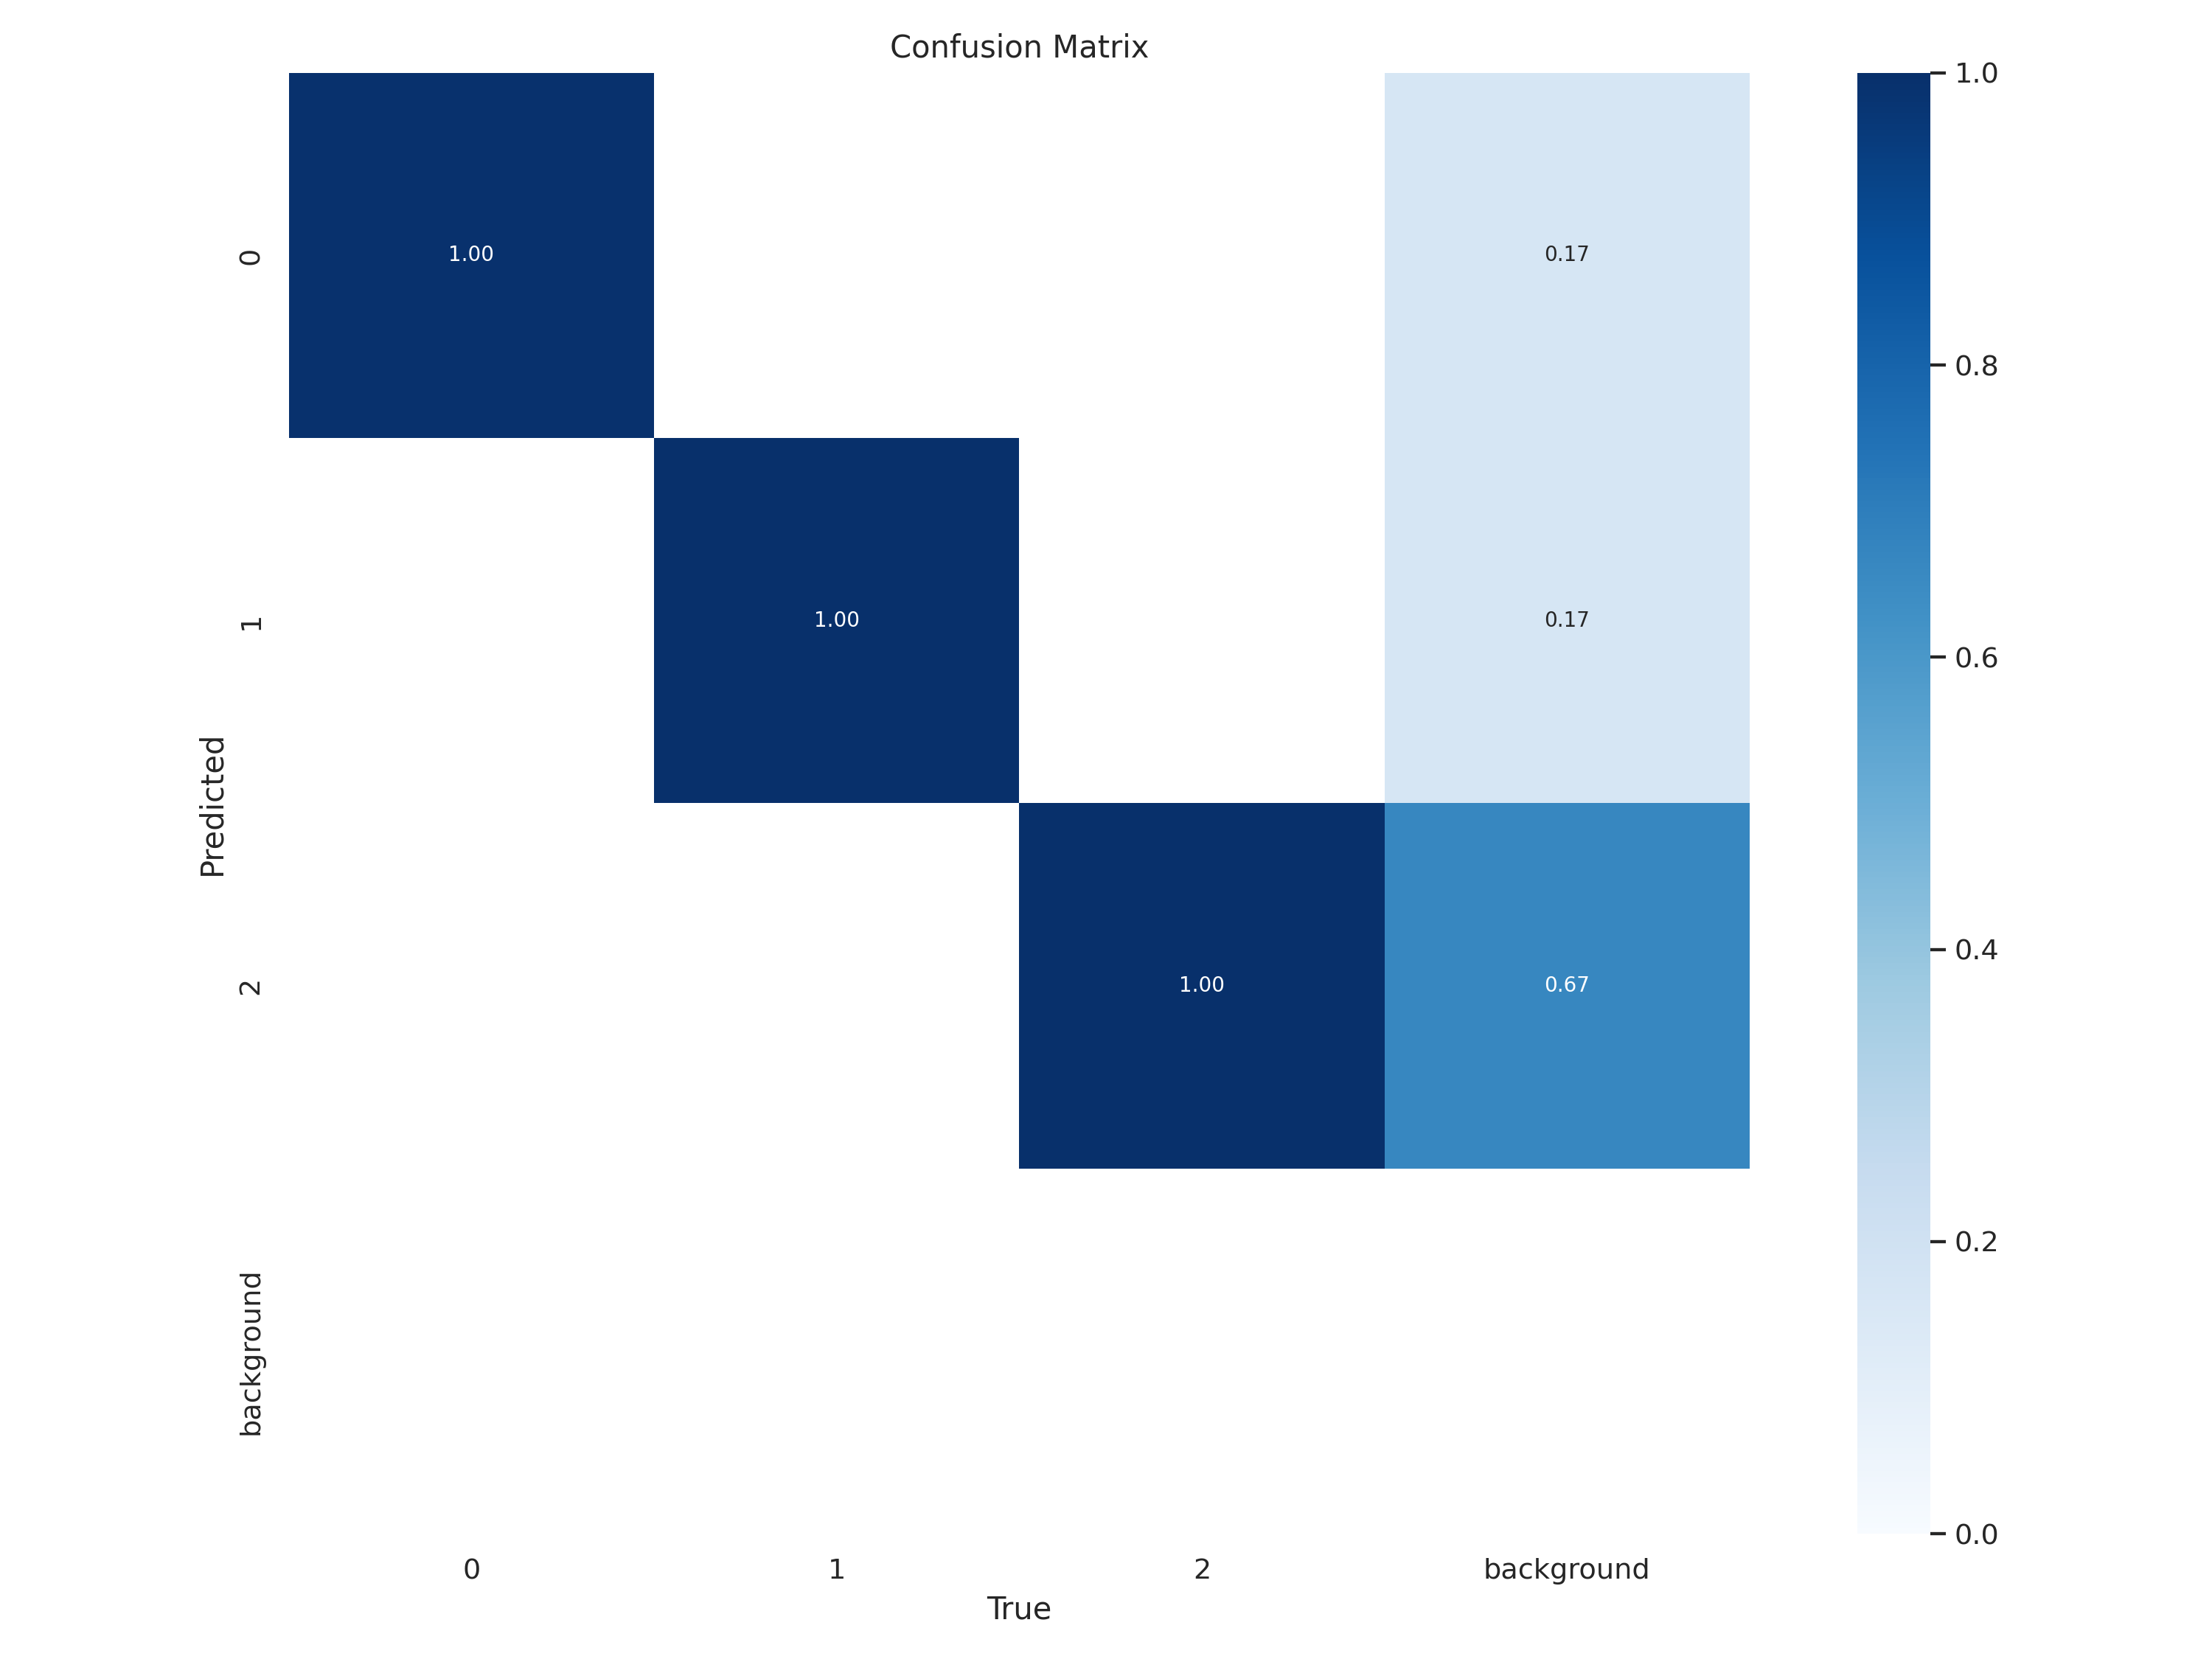

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8
Image(filename=f'{HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/confusion_matrix.png', width=600)

/content/gdrive/MyDrive/yolov8


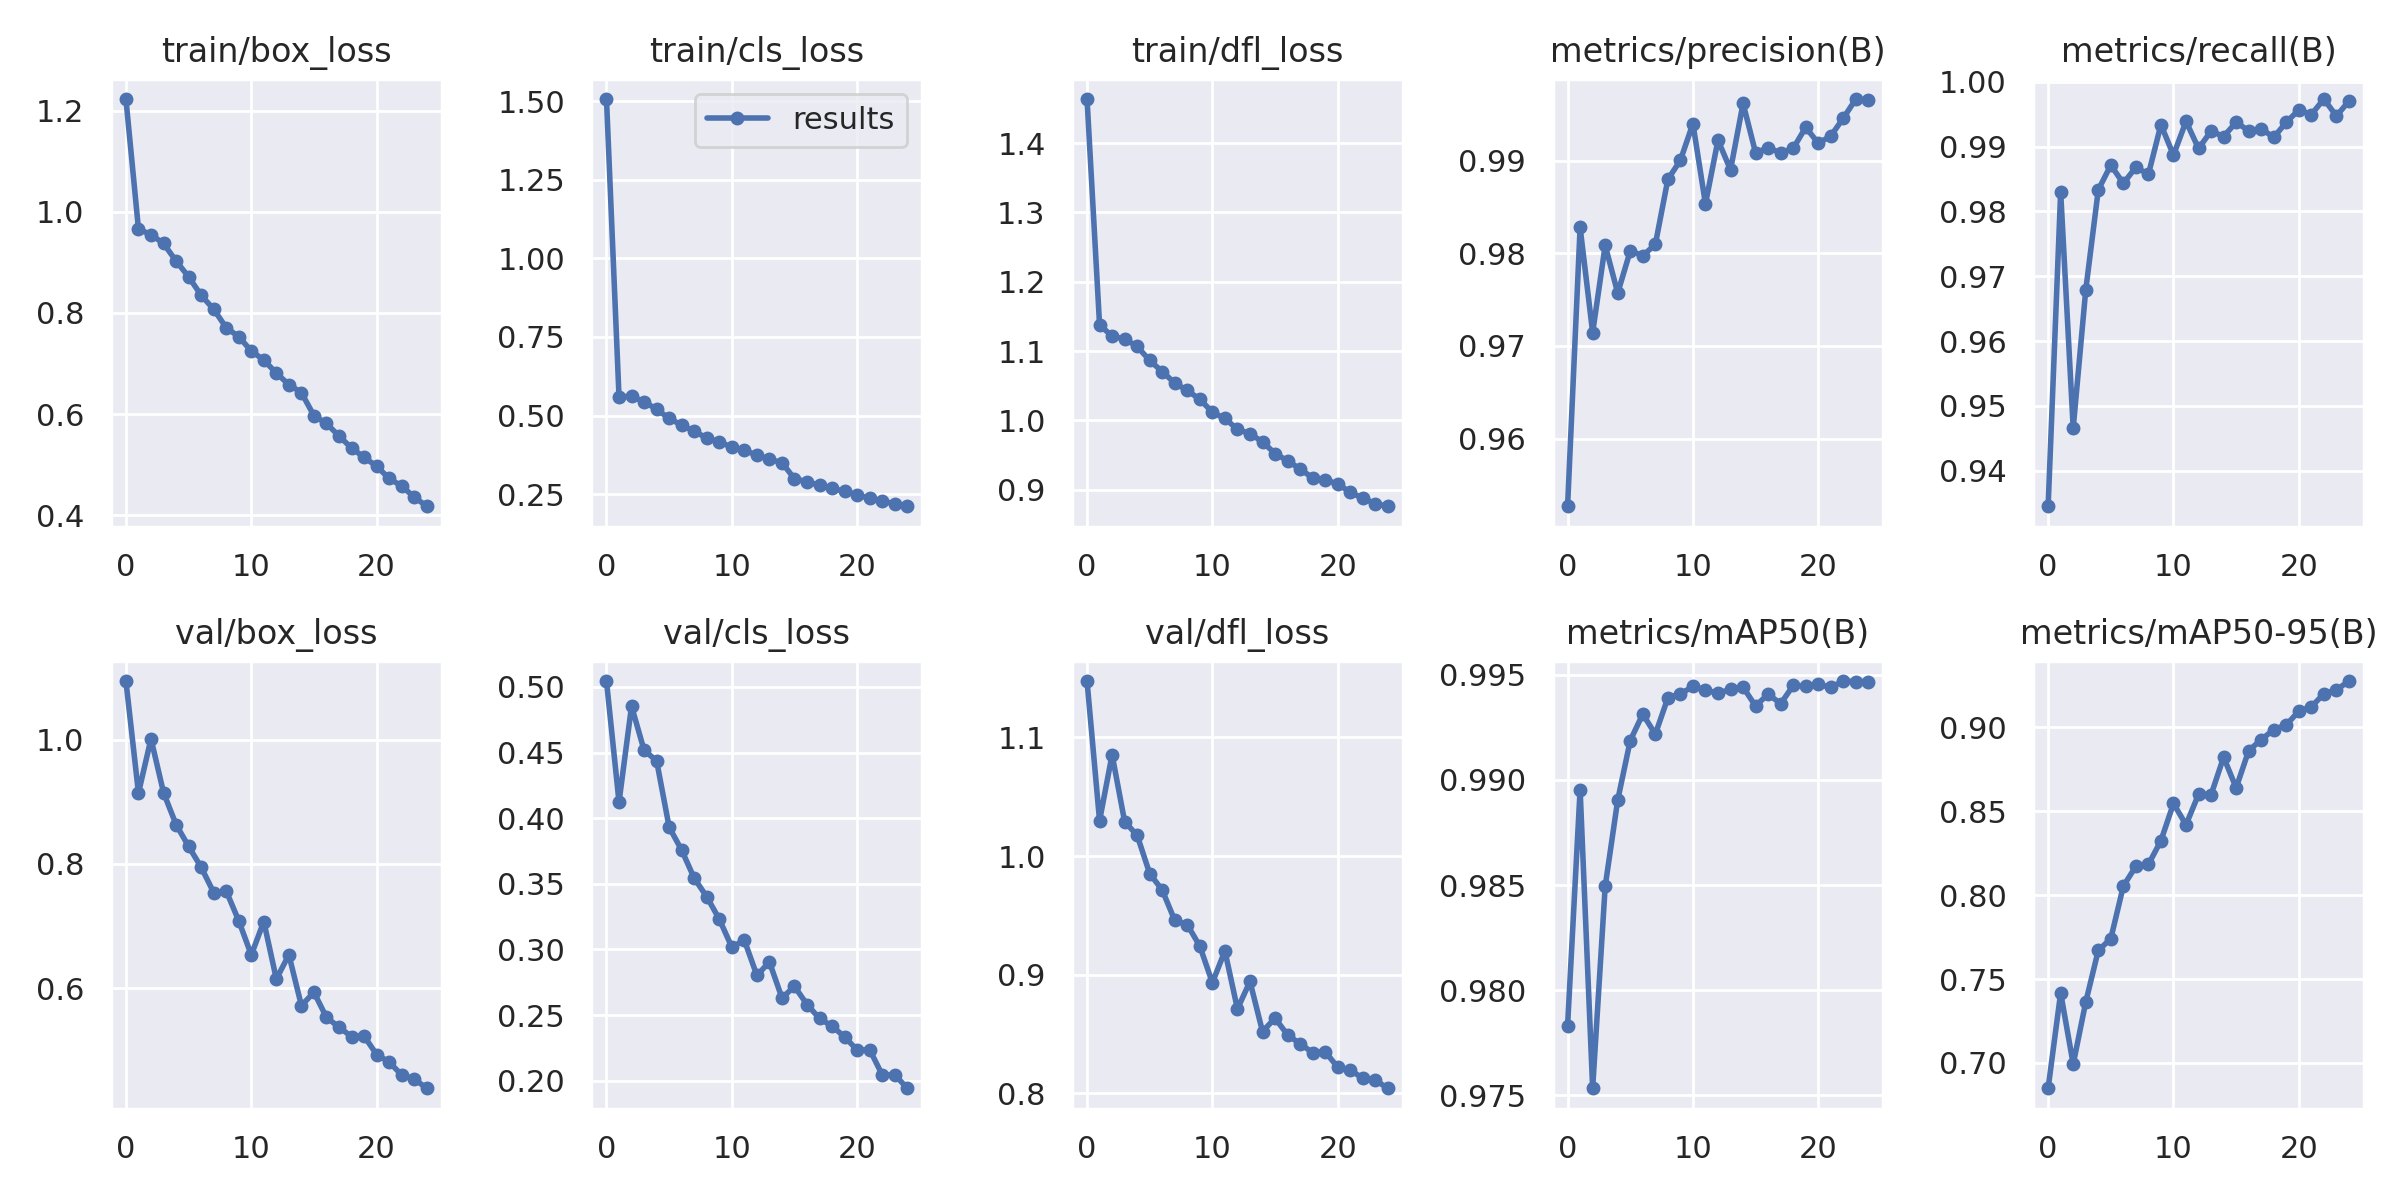

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8
Image(filename=f'{HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/results.png', width=600)

/content/gdrive/MyDrive/yolov8


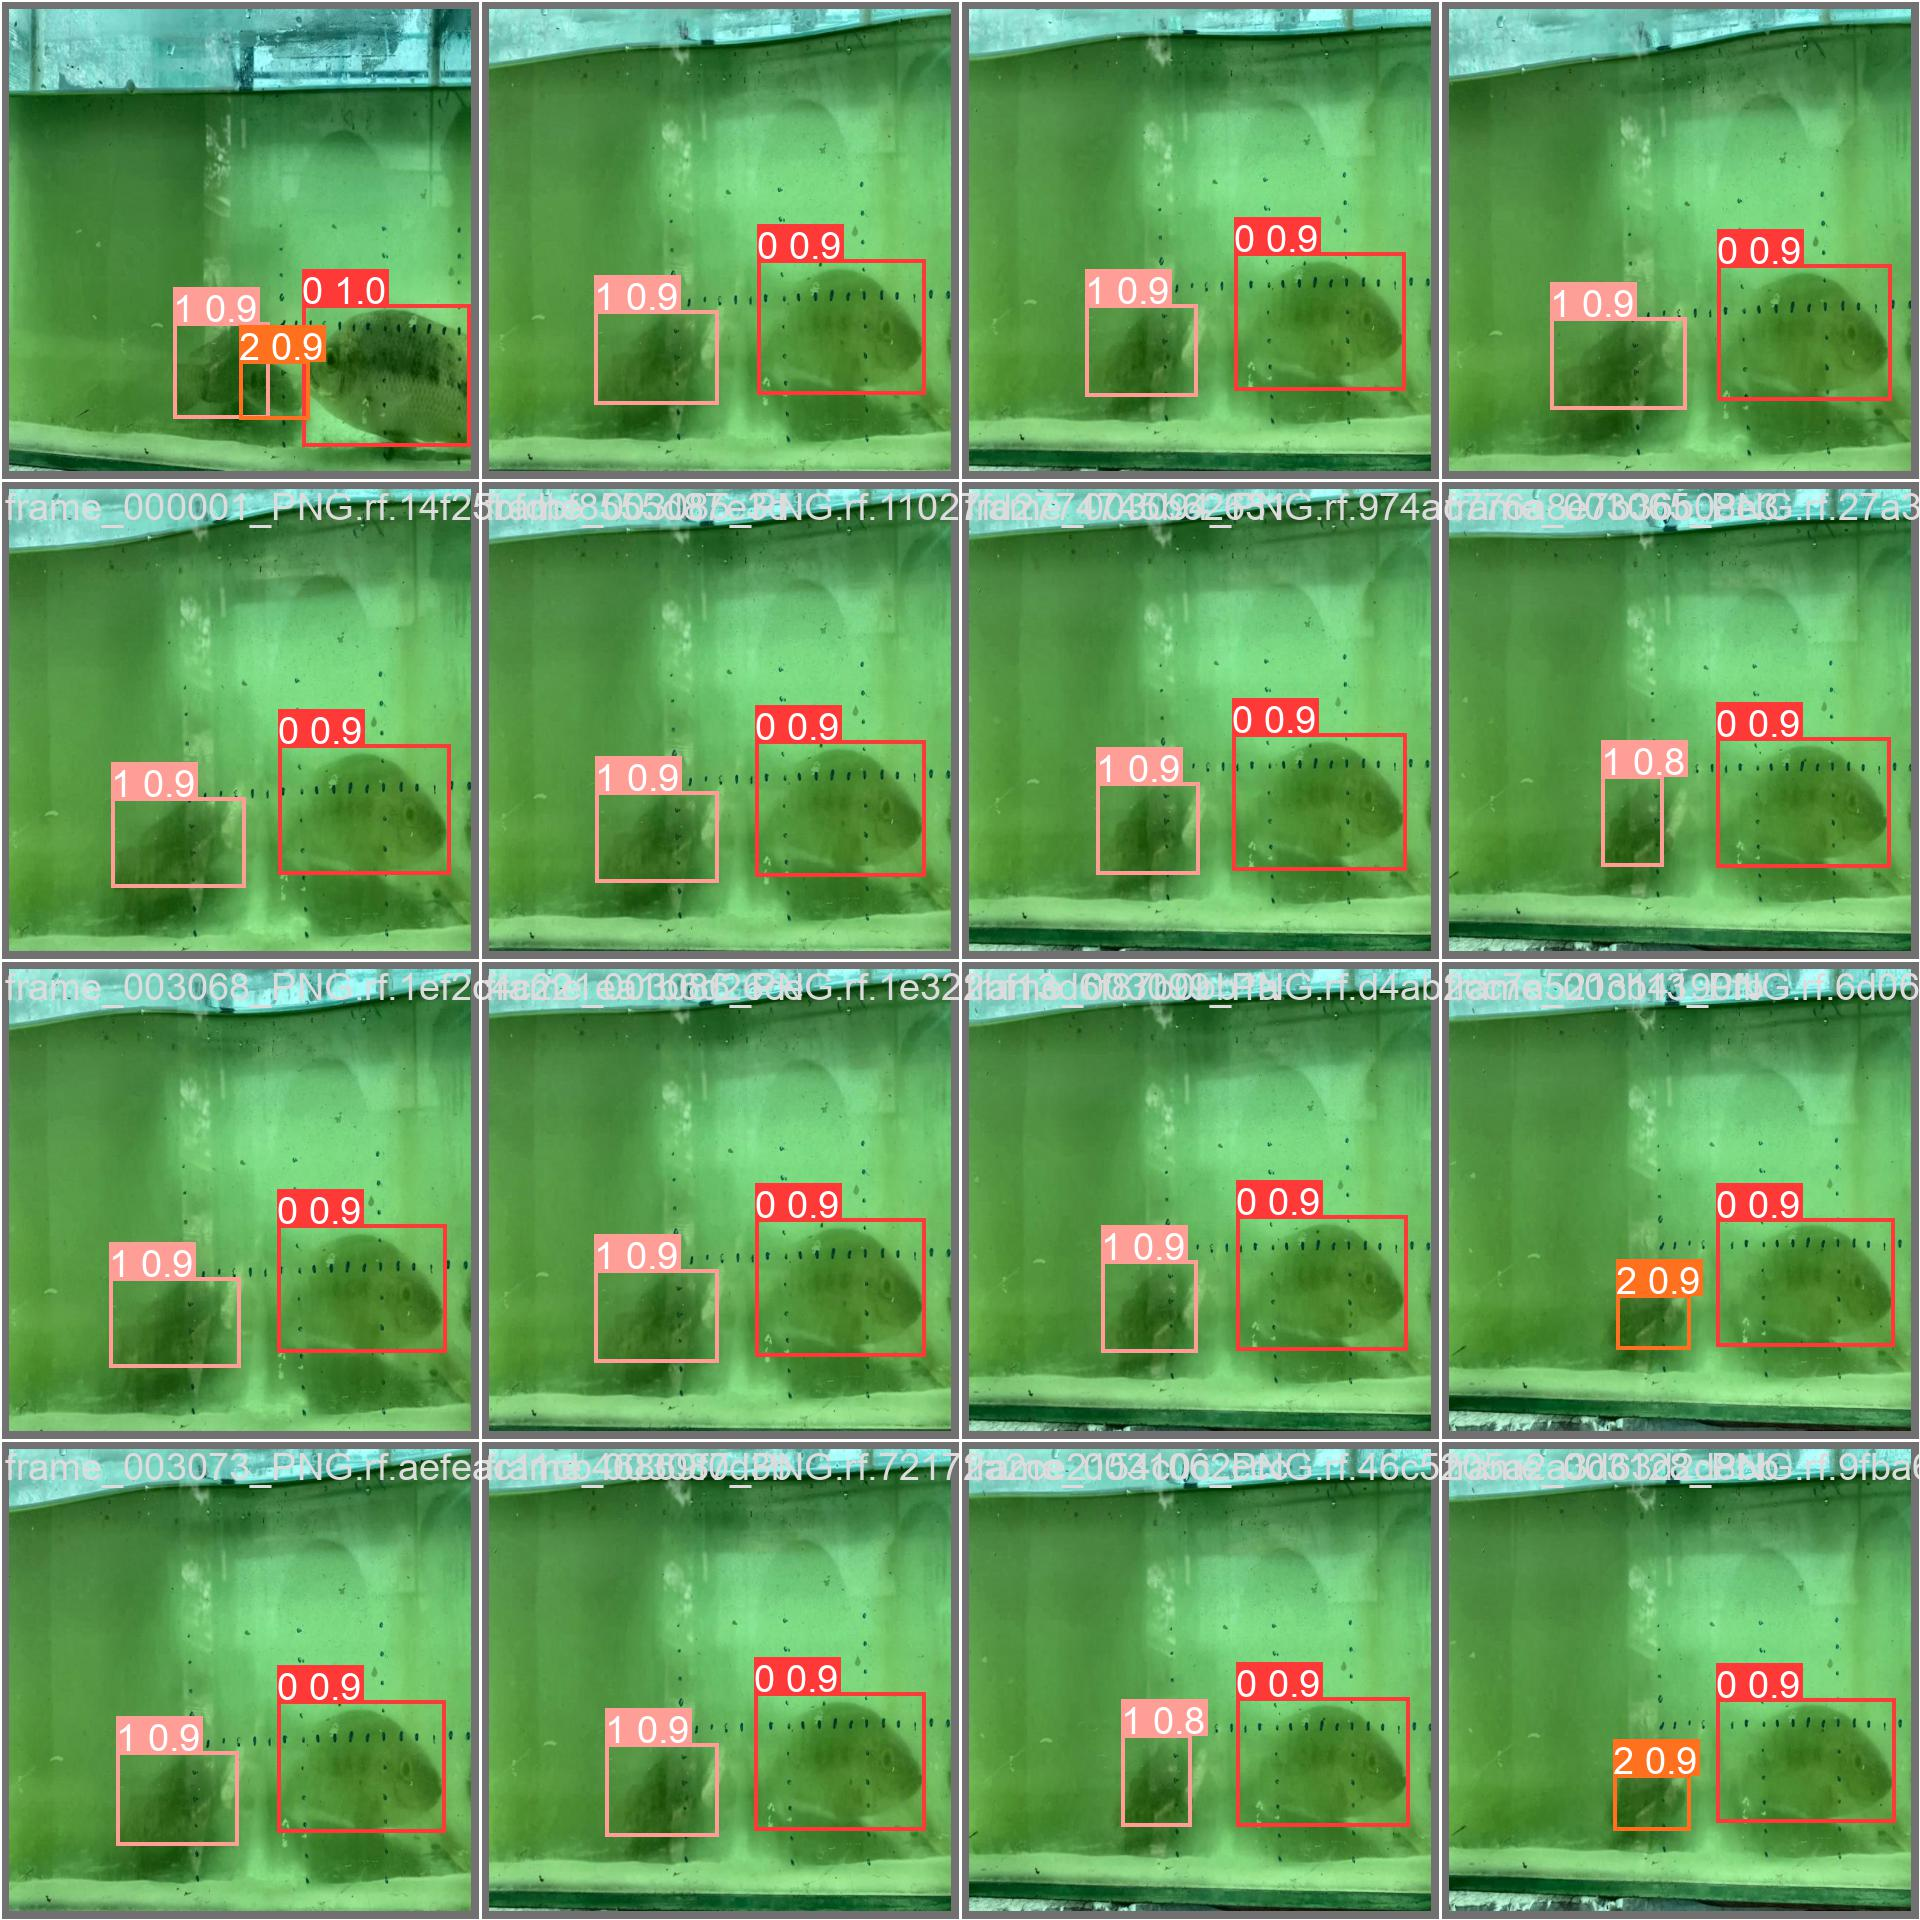

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8
Image(filename=f'{HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/weights/

!yolo task=detect mode=val model={HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive/yolov8/runs/detect/train11/weights
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/clahe_pr-1/valid/labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100% 914/914 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 58/58 [00:22<00:00,  2.54it/s]
                   all        914       2182      0.996      0.997      0.995      0.928
                     0        914        900      0.997      0.996      0.995      0.965
                     1        914        615          1      0.998      0.995      0.935
                     2        914        667      0.992      0.997      0.994      0.884
Speed: 1.3ms pre-process, 13.2ms inference, 0.0ms loss, 1.7ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}/gdrive/MyDrive/yolov8
!yolo task=detect mode=predict model={HOME}/gdrive/MyDrive/yolov8/runs/detect/train11/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_txt=True

/content/gdrive/MyDrive/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/458 /content/datasets/clahe_pr-1/test/images/frame_000000_PNG.rf.9f664b90f442da495972055c9fd733c8.jpg: 800x800 1 0, 1 1, 1 2, 26.1ms
image 2/458 /content/datasets/clahe_pr-1/test/images/frame_000035_PNG.rf.4a598ab1e4a505a847ddc1b531207a8a.jpg: 800x800 1 0, 1 1, 1 2, 26.1ms
image 3/458 /content/datasets/clahe_pr-1/test/images/frame_000056_PNG.rf.0dd6d73d56314c18b10ac507449b737a.jpg: 800x800 1 0, 1 1, 1 2, 26.1ms
image 4/458 /content/datasets/clahe_pr-1/test/images/frame_000069_PNG.rf.76c31242f587ea2248e5018de540a306.jpg: 800x800 1 0, 1 1, 1 2, 26.1ms
image 5/458 /content/datasets/clahe_pr-1/test/images/frame_000081_PNG.rf.329e55df7e458bff49cd606f66c7caf6.jpg: 800x800 1 0, 1 1, 1 2, 26.1ms
image 6/458 /content/datasets/clahe_pr-1/test/images/frame_000090_PNG.rf.5b67c0f462c71dfb7d198a9

**NOTE:** Let's take a look at few results.

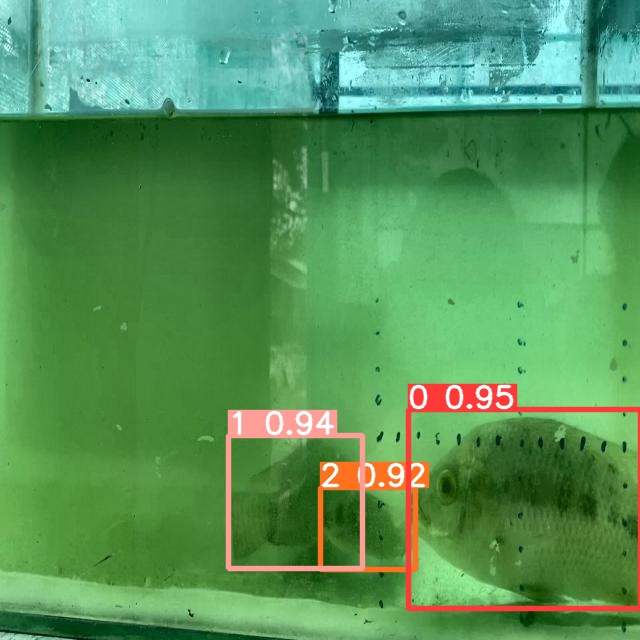

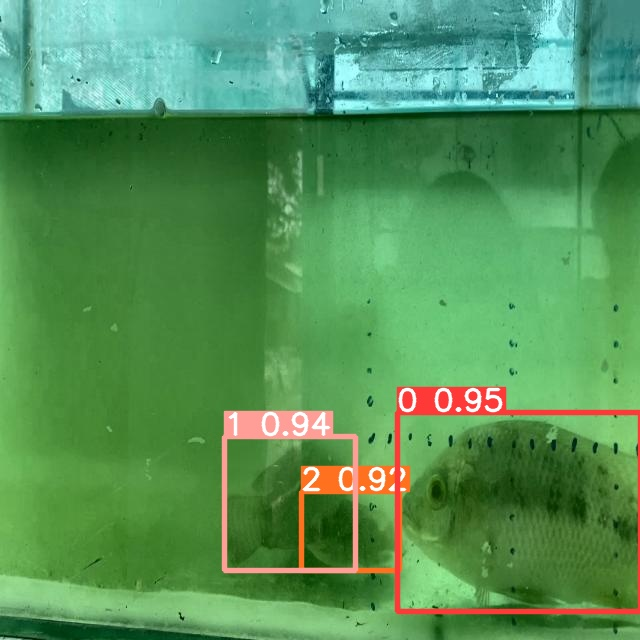

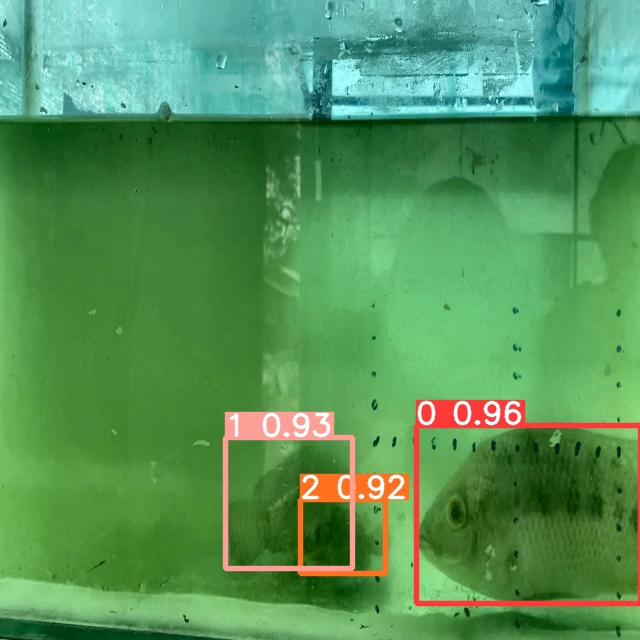

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/gdrive/MyDrive/yolov8/runs/detect/predict10/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")